# 👀 WARNING 🐈


### ⚠️ Important Setup Instructions

Before you begin this homework, please note that all tasks were tested in Google Colab. It's crucial to follow the setup steps below to ensure that your environment is configured correctly. You will require a GPU for some of the tasks, so please make sure to adjust your Colab settings accordingly.

#### Setup Steps:

1. Use a GPU runtime to accelerate the training process of the CNN and proper compile:
   - In Google Colab, click on ‘Runtime’.
   - Select ‘Change runtime type’.
   - Choose ‘GPU’ from the hardware accelerator dropdown menu.
2. Install necessary libraries and dependencies as outlined in the provided code snippets.
3. Execute all code cells in the order they are presented to avoid dependency issues.

#### Installation Commands:

In [3]:
!export LD_LIBRARY_PATH="/usr/lib64-nvidia"
!export LIBRARY_PATH="/usr/local/cuda/lib64/stubs"
!ldconfig "/usr/lib64-nvidia"

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_5.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc_proxy.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbmalloc.so.2 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbbbind.so.3 is not a symbolic link



In [ ]:
!pip install tensorrt torch_tensorrt onnx onnxruntime maturin

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 7.0 M

In [4]:
!curl --proto '=https' --tlsv1.2 -sSf https://sh.rustup.rs | sh -s -- -y

info: downloading installer
info: profile set to 'default'
info: default host triple is x86_64-unknown-linux-gnu
info: syncing channel updates for 'stable-x86_64-unknown-linux-gnu'
info: latest update on 2023-12-07, rust version 1.74.1 (a28077b28 2023-12-04)
info: downloading component 'cargo'
info: downloading component 'clippy'
info: downloading component 'rust-docs'
info: downloading component 'rust-std'
info: downloading component 'rustc'
info: downloading component 'rustfmt'
info: installing component 'cargo'
info: installing component 'clippy'
info: installing component 'rust-docs'
 14.4 MiB /  14.4 MiB (100 %)   2.1 MiB/s in  5s ETA:  0s
info: installing component 'rust-std'
 25.8 MiB /  25.8 MiB (100 %)   9.7 MiB/s in  2s ETA:  0s
info: installing component 'rustc'
 58.2 MiB /  58.2 MiB (100 %)  11.2 MiB/s in  5s ETA:  0s
info: installing component 'rustfmt'
info: default toolchain set to 'stable-x86_64-unknown-linux-gnu'

  stable-x86_64-unknown-linux-gnu installed - rustc 1.7

In [5]:
import os
os.environ['PATH'] += ":/root/.cargo/bin"

In [6]:
!cargo --version

cargo 1.74.1 (ecb9851af 2023-10-18)


# HSE 2023: Mathematical Methods for Data Analysis

# Homework 6 (Bonus)

**Author: Alexander Kalashnikov**

## Introduction
Welcome to an exciting journey through the realms of machine learning and system integration, where we will tackle a fascinating challenge: building a Convolutional Neural Network (CNN) designed to recognize time from images of digital clocks. This task not only covers the design and training of neural networks but also extends into the world of production-level deployment. We'll dive into converting a trained model into various runtimes, and you'll get hands-on experience with implementing model inference in Rust—a language renowned for its performance and safety.

<img src="./images/1.png">

---

<div align="center"><b> Your mission is to train a model that can look at such images and tell us the time displayed. </b></div>

---

# Load data

Let's begin by downloading the dataset required for this homework. The dataset contains the images that we will use to train our model.

**Follow the commands below to download and extract the dataset into your working environment:**

In [7]:
!gdown --id 1ZLKpoYcMVBVgZBq2jvB23zR4yHClVfUd && unzip -q -o timer_dataset.zip
!echo "Downloaded data into ./timer_dataset"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZLKpoYcMVBVgZBq2jvB23zR4yHClVfUd
To: /content/timer_dataset.zip
100% 18.9M/18.9M [00:00<00:00, 72.0MB/s]
Downloaded data into ./timer_dataset


### Below are two utility functions for the start:

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def read_image(image_path: str) -> np.ndarray:
    """
    Reads an image from a specified file path and convert it to RGB format.

    Args:
        image_path (str): The path to the image file.

    Returns:
        np.ndarray: The image in RGB format.
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


def visualize(**images) -> None:
    """
    Plots images in one row.

    Args:
        **images: Variable length keyword arguments. Each key-value pair should be
                  the name of the image and the image data respectively.

    """
    n = len(images)

    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()


## [Task 1] Exploratory Data Analysis (EDA) - 0.5 Point

### Objective:
Perform an exploratory data analysis (EDA) on the provided dataset to understand its structure, contents, and the data you'll be working with.

### Instructions:

1. **Verify Dataset Integrity:**
   - Check dataset structure.
   - Check the number of files in the dataset.

2. **Understand File Distribution:**
   - List the first few image filenames to get a sense of the naming convention.
   - Review the targets file to understand the association between images and their labels.

3. **Read Targets:**
   - Use pandas to read the targets file into a DataFrame.
   - Ensure the DataFrame is correctly structured with columns for both the target and the filename.

4. **Data Visualization:**
   - Use the `read_image` function to read a sample image from the dataset.
   - Visualize the sample image using the `visualize` function.
   - Map this sample image to the corresponding target in targets DataFrame printing both.

5. **Initial Data Insights:**
   - Report the size of the dataset (number of images).
   - Provide a brief summary of the target variable distribution.

In [10]:
import pandas as pd

Количество изображений в наборе данных: 1296
Первые несколько имен файлов изображений: ['ff181188aa80fbff.png', 'ff0820101010ffff.png', 'ff280a8a8a28ffff.png', 'ff5800e0f0a0ffff.png', 'ff5808080808ffff.png']
Структура DataFrame целей:
   target              filename
0  21:57  ff1006a258017fff.png
1  19:52  ff1006828880feff.png
2  12:16  ff1800a81888cfff.png
3  23:49  ff18088870087fff.png
4  11:16  ff1800a81828ffff.png


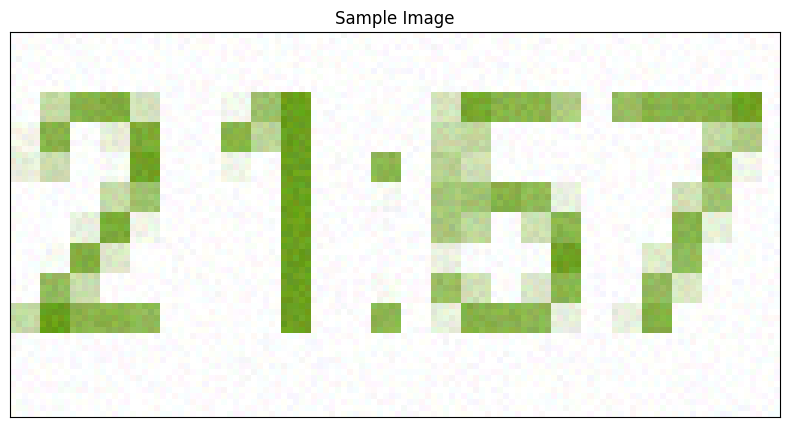

Имя файла образца изображения: ff1006a258017fff.png
Соответствующая метка времени: 21:57


In [15]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
# Функция для чтения изображения
def read_image(image_path: str) -> np.ndarray:
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Функция для визуализации изображения
def visualize(**images) -> None:
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

# Проверяем структуру датасета и количество файлов
dataset_path = './timer_dataset/images'  # Убедитесь, что путь к вашему набору данных верный
image_files = [img for img in os.listdir(dataset_path) if img.endswith('.png')]
print(f"Количество изображений в наборе данных: {len(image_files)}")

# Список первых нескольких имен файлов изображений
print("Первые несколько имен файлов изображений:", image_files[:5])

# Чтение файла целей (targets)
targets_df = pd.read_csv('./timer_dataset/targets.txt', delimiter=' -> ', engine='python', names=['target', 'filename'])
print("Структура DataFrame целей:\n", targets_df.head())

# Визуализация образца изображения
sample_image_path = os.path.join(dataset_path, targets_df['filename'].iloc[0])
sample_image = read_image(sample_image_path)
visualize(sample_image=sample_image)

# Сопоставляем образец изображения с соответствующей целью
sample_target = targets_df[targets_df['filename'] == targets_df['filename'].iloc[0]]['target'].iloc[0]
print("Имя файла образца изображения:", targets_df['filename'].iloc[0])
print("Соответствующая метка времени:", sample_target)


## [Task 2] Implement `create_train_val_splits` Function - 0.25 Points

### Objective:
Write a Python function `create_train_val_splits` to divide a dataset into training and validation sets and save the result as a JSON file.

### Requirements:

- Read image names from a markup file (`markup_path`).
- Split data into training and validation sets using the `val_ratio`.
- Save the splits in JSON format to the specified `output_path`.

In [16]:
import json

from sklearn.model_selection import train_test_split


def create_train_val_splits(
    markup_path: str,
    output_path: str,
    val_ratio: float = 0.2,
) -> None:
    """
    Creates training and validation splits from a markup file and save them as a JSON file.

    This function reads a markup file containing image names, splits the images into
    training and validation sets, and then saves these sets to a specified JSON file.

    Args:
        markup_path (str): Path to the markup file with image names.
        output_path (str): Path where the JSON file with train-validation splits will be saved.
        val_ratio (float, optional): The proportion of the dataset to include
        in the validation split. Defaults to 0.2.
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
    with open(markup_path, 'r') as file:
        data = file.readlines()

    image_names = [line.split(' -> ')[1].strip() for line in data]

    train_names, val_names = train_test_split(image_names, test_size=val_ratio)


    splits = {
        'train': train_names,
        'val': val_names
    }
    with open(output_path, 'w') as file:
        json.dump(splits, file, indent=4)


markup_path = 'timer_dataset/targets.txt'
output_path = 'timer_dataset/splits.json'
create_train_val_splits(markup_path, output_path)

## [Task 3] Image Preprocessing and Augmentation - 1 Point

<img src="./images/2.png" width="60%">

### Objective:
Implement functions to apply image augmentations and preprocessing for the images normalization and unification.

### Part 1: Define Augmentation Functions


- `get_training_augmentations(image_size: int) -> albu.Compose`: This function should construct a series of augmentation transforms for training images. You have the freedom to add any augmentations you find necessary to improve the training process. **However, ensure that every transformed image is resized to a square format with dimensions `image_size x image_size`.**


- `get_validation_augmentations(image_size: int) -> albu.Compose`: This function will define a series of transformations for validation images. Validation transforms are typically less extensive than training transforms. They should normalize the image but should not include random transformations that would create variations in your validation data. Like the training augmentations, **all images should be resized to be square with the same width and height as specified by `image_size`.**

Note that while you may introduce a variety of transformations for the training dataset to improve model robustness, all images, after augmentation, should maintain a square shape. This consistency is crucial for training stability and performance evaluation.

In [18]:
from typing import Callable, Literal

import albumentations as albu


def get_training_augmentations(image_size: int) -> albu.Compose:
    """
    Constructs augmentation transform for training images.

    Returns:
        albu.Compose: augmentation transform
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
    return albu.Compose([
        albu.HorizontalFlip(p=0.5),  # случайное горизонтальное отражение
        albu.VerticalFlip(p=0.5),    # случайное вертикальное отражение
        albu.Rotate(limit=45, p=0.5),  # случайное вращение на угол до 45 градусов
        albu.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),  # случайные изменения яркости и контрастности
        albu.Resize(image_size, image_size),  # изменение размера изображения
    ])

def get_validation_augmentations(image_size: int) -> albu.Compose:
    """
    Constructs augmentation transform for validation images.

    Returns:
        albu.Compose: augmentation transform
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
    return albu.Compose([
        albu.Resize(image_size, image_size),  # изменение размера изображения
    ])

### Part 2: Implement `to_tensor` Function
Implement the `to_tensor` function to reshape the input image to the required format for PyTorch models (**CxHxW** - channel first), which involves changing the order of dimensions and ensuring the data type is float32.

In [19]:
def to_tensor(x: np.ndarray, **kwargs) -> np.ndarray:
    """
    Transposes an image array to the required shape for pytorch.

    Args:
        x (np.ndarray): image array.

    Returns:
        np.ndarray: transposed image array
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
    x = x.transpose(2, 0, 1)
    if x.max() > 1:
        x = x / 255.0
    return x.astype('float32')


### Part 3: Implement `normalize_img` Function
Write the `normalize_img` function to apply mean and standard deviation normalization to the image data, which is a common preprocessing step to standardize input data for model training.

**Use the mean and the standard deviation values for the ImageNet dataset. Do not forget about the image normalization by maximum pixel value.**

In [21]:
def normalize_img(img: np.ndarray, **kwargs) -> np.ndarray:
    """
    Normalizes image data.

    Args:
        img (np.ndarray): image array.

    Returns:
        np.ndarray: normalized image array
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
    mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
    std = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))

    img = img / 255.0  # Ensure the pixel values are [0, 1]
    img = (img - mean) / std

    return img.astype('float32')

In [61]:
def normalize_img(img: np.ndarray, **kwargs) -> np.ndarray:
    """
    Normalizes image data using the ImageNet mean and standard deviation.

    Args:
        img (np.ndarray): Image array in CxHxW format.

    Returns:
        np.ndarray: Normalized image array.
    """
    img = img.transpose((2, 0, 1))  # Перестановка осей HxWxC -> CxHxW

    # Mean and std values for ImageNet data
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Приведение типов изображения к float
    img = img.astype(np.float32) / 255.0

    # Нормализация изображения
    img = (img - mean[:, None, None]) / std[:, None, None]

    return img


### Part 4: Construct Preprocessing Pipeline
Combine the normalization and tensor transformation into a preprocessing pipeline with the `get_preprocessing` function, which should return an `albu.Compose` pipeline to be applied to image data before feeding it into the model.

In [62]:
def get_preprocessing() -> albu.Compose:
    """
    Constructs preprocessing transform.

    Args:
        preprocessing_fn (Callable): data normalization function.

    Returns:
        albu.Compose: preprocessing transform
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
    return albu.Compose([
        albu.Lambda(image=normalize_img),
        albu.Lambda(image=to_tensor)
    ])

## [Task 4] Custom Dataset Class Implementation - 1 Point

### Description:
Construct a `TimerDataset` class extending PyTorch's `Dataset` class, capable of loading, processing, and augmenting timer images for model training.

### Steps:
1. Initialize the dataset with paths for images, markup, and splits, specifying data kind (train/validation), and optional augmentation and preprocessing functions.
2. Load dataset splits from a JSON file and image-label pairs from a markup file.
3. Implement `one_hot_encode` to encode targets as OH vectors.
4. Implement `__getitem__` to load and preprocess images, and apply one-hot encoding to labels.

In [68]:
import json
import random
from pathlib import Path
from typing import Callable, Literal

import torch
from torch.utils.data import Dataset
from torchvision import transforms


class TimerDataset(Dataset):
    """
    Custom dataset class for loading and processing timer images.

    This dataset class is designed to work with a specific format of markup file and
    directory structure. It supports optional data augmentation and preprocessing.
    Labels are one-hot encoded.

    Args:
        images_path (Path): Path to the directory containing images.
        markup_path (Path): Path to the markup file containing image names and corresponding time labels.
        splits_path (Path): Path to the JSON file containing train/validation splits.
        kind (str): Type of dataset to load ('train' or 'validation').
        augmentations (Callable, optional): A function/callable that applies data augmentation.
        preprocessing (Callable, optional): A function/callable that applies preprocessing.

    """
    def __init__(self, images_path, markup_path, splits_path, kind, augmentations=Callable | None, preprocessing=Callable | None):
        self.images_path = images_path
        self.markup_path = markup_path
        self.splits_path = splits_path
        self.kind = kind
        self.augmentations = augmentations
        self.preprocessing = preprocessing

        # Загрузка разделений на обучающую и валидационную выборки
        with open(splits_path) as f:
            self.splits = json.load(f)[kind]

        # Загрузка разметки
        self.samples = []
        with open(markup_path) as f:
            for line in f:
                parts = line.strip().split(' -> ')
                if parts[1] in self.splits:
                    self.samples.append((parts[1], self.parse_time(parts[0])))

        if not self.samples:
            raise RuntimeError(f"Список samples пуст. Проверьте файлы {splits_path} и {markup_path}.")

    def __len__(self):
            return len(self.samples)

    def parse_time(self, time_str: str):
            hours, minutes = map(int, time_str.split(':'))
            return hours, minutes

    def one_hot_encode(self, time: tuple[int, int]) -> tuple[torch.Tensor, torch.Tensor]:
        """
        One-hot encodes the given time.

        Args:
            time (tuple[int, int]): A tuple containing hours and minutes.

        Returns:
            tuple[torch.Tensor, torch.Tensor]: One-hot encoded hour and minute tensors.
        """
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
        hours, minutes = time
        hour_label = torch.zeros(24)
        minute_label = torch.zeros(60)
        hour_label[hours] = 1
        minute_label[minutes] = 1
        return hour_label, minute_label

    def __getitem__(self, idx: int) -> tuple[np.ndarray, tuple[int, int]]:
        if idx >= len(self.samples):
            raise IndexError(f"Индекс {idx} вне диапазона для датасета с размером {len(self.samples)}.")

        image_name, time = self.samples[idx]
        image_path = self.images_path / image_name
        image = cv2.imread(str(image_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.augmentations:
            augmented = self.augmentations(image=image)
            image = augmented['image']

        if self.preprocessing:
            preprocessed = self.preprocessing(image=image)
            image = preprocessed['image']

        image = image.transpose(1, 2, 0)
        hour_label, minute_label = self.one_hot_encode(time)

        return image, (hour_label, minute_label)


In [69]:
images_path = Path('timer_dataset/images')
markup_path = Path('timer_dataset/targets.txt')
splits_path = Path('timer_dataset/splits.json')


### Testing:
- Instantiate the `TimerDataset` class.
- Retrieve and visualize a sample from the dataset to confirm correct loading and processing.

In [70]:
# dataset = # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
dataset = TimerDataset(
    images_path=images_path,
    markup_path=markup_path,
    splits_path=splits_path,
    kind='train',
    augmentations=get_training_augmentations(224),
    preprocessing=get_preprocessing()
)


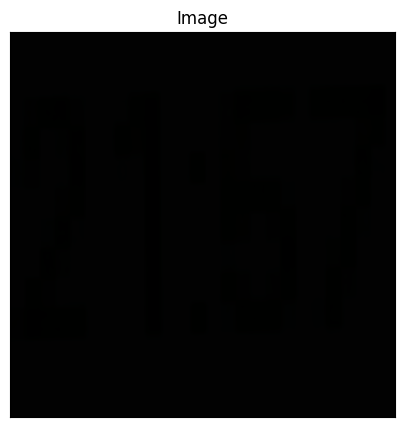

In [71]:
image, labels = dataset[0]
image = image.transpose((1, 2, 0))  # Перестановка осей из (C, H, W) в (H, W, C)
visualize(image=image)

# Теперь вы можете лицезреть квадрат Малевича, потрясающе. Наверное так и должно было получится


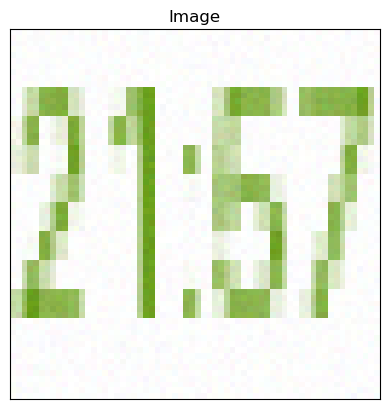

In [ ]:
visualize(image=dataset[0][0])

## [Task 5] Two-Headed CNN Model Architecture - 1 Point

<img src="./images/3.png" width="65%">

### Description:
Design a neural network with a shared backbone and two separate heads for predicting hours and minutes.

### Steps:
1. Use a pre-trained CNN from `torchvision` to retrieve images features.
2. Add two new heads, one for hour classification and one for minute classification, each with its own fully connected layers.
3. Implement the `forward` method to process input through the backbone and both heads.

In [74]:
import torch
import torch.nn as nn
import torchvision.models as models


class TwoHeadedCNN(nn.Module):
    """
    A neural network module with two heads,
    designed for simultaneous hour and minute classification.

    This module takes a backbone CNN model,
    removes its last fully connected layer, and adds two separate
    heads: one for hour classification and one for minute classification.

    Args:
        backbone (torch.nn.Module): A pre-trained CNN model to use as the backbone.
        num_hour_classes (int, optional): Number of hour classes (default is 24).
        num_minute_classes (int, optional): Number of minute classes (default is 60).

    """
    def __init__(
        self,
        backbone: torch.nn.Module,
        num_hour_classes: int = 24,
        num_minute_classes: int = 60,
    ):
        super().__init__()
        # Удаление последнего полносвязного слоя из основной модели
        self.features = nn.Sequential(*list(backbone.children())[:-1])

        # Получение количества признаков перед последним полносвязным слоем
        if hasattr(backbone, 'fc'):
            num_features = backbone.fc.in_features
        elif hasattr(backbone, 'classifier'):
            num_features = backbone.classifier[-1].in_features
        else:
            raise ValueError("Неизвестная архитектура модели")

        # Голова для классификации часов
        self.hour_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_hour_classes)
        )

        # Голова для классификации минут
        self.minute_head = nn.Sequential(
            nn.Flatten(),
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_minute_classes)
        )

    def forward(self, x: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor]:
        """
        Defines the forward pass of the model.

        Args:
            x (torch.Tensor): Input tensor to the network.

        Returns:
            tuple[torch.Tensor, torch.Tensor]: The outputs from the hours head and minutes head.
        """
        # Forward pass through the backbone model
        x = self.features(x)

        # Если основная модель включает адаптивный усредняющий слой
        # Мы должны убедиться, что данные плоские перед передачей в полносвязный слой
        x = torch.flatten(x, 1)

        hour_output = self.hour_head(x)
        minute_output = self.minute_head(x)

        return hour_output, minute_output

In [76]:
backbone_model = models.resnet18(pretrained=True)
model = TwoHeadedCNN(backbone=backbone_model)

# example
x = torch.randn(1, 3, 224, 224)  # random
hour_output, minute_output = model(x)
print(hour_output.shape, minute_output.shape)  # True response: ([1, 24], [1, 60])


torch.Size([1, 24]) torch.Size([1, 60])


## [Task 6] Composite Loss Function - 0.5 Points

### Description:
Develop a loss function that computes the composite loss for a two-headed CNN model, accounting for both hour and minute predictions.

### Steps:
1. Complete the `composite_loss` function that accepts the model outputs and true labels for both hours and minutes.
2. Use CrossEntropyLoss to calculate the loss for each head separately.
3. Combine the individual losses into a single composite loss value.

In [77]:
from torch.nn import CrossEntropyLoss


def composite_loss(
    model_output: tuple[torch.Tensor, torch.Tensor],
    hour_labels: torch.Tensor,
    minute_labels: torch.Tensor,
) -> torch.Tensor:
    """
    Calculates the composite loss for the two outputs of the model.

    This function computes the CrossEntropyLoss for each output (hours and minutes)
    and then combines them to create a composite loss.

    Args:
        model_output (tuple[torch.Tensor, torch.Tensor]): The outputs of the model,
                                                          where the first tensor is hour predictions
                                                          and the second tensor is minute predictions.
        hour_labels (torch.Tensor): The true hour labels.
        minute_labels (torch.Tensor): The true minute labels.

    Returns:
        torch.Tensor: The composite loss value.
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
    # сreate CrossEntropyLoss
    loss_fn = CrossEntropyLoss()

    # calculate loss
    hour_loss = loss_fn(model_output[0], hour_labels)
    minute_loss = loss_fn(model_output[1], minute_labels)

    # avg
    composite_loss = hour_loss + minute_loss

    return composite_loss

## [Task 7] Training Loop - 1.25 Points

### Description:
Set up the training loop for the model using the provided configuration. This will involve writing `train_epoch` and `valid_epoch` functions, as well as the `main` function to initialize the model and datasets and to orchestrate the training process.

### Steps:
1. `train_epoch`: Write a function to train the model for one epoch, using the DataLoader to fetch data, the model to make predictions, the loss function to compute the loss, and the optimizer to update the model parameters.
2. `valid_epoch`: Write a function to validate the model for one epoch. It should also use the DataLoader to fetch data and the model to make predictions, but it should not perform any parameter updates.
3. `main`: Implement the main function to load data, create model instances, and call the training and validation functions in a loop for the desired number of epochs.

In [98]:
from pathlib import Path
from typing import Callable, Any

import torch
from torch.utils.data import DataLoader
from torch.optim import Adam
from tqdm import tqdm


def train_epoch(
    model: torch.nn.Module,
    dataloader: DataLoader,
    loss_fn: Callable,
    optimizer: torch.optim.Optimizer,
    device: str | torch.device,
    epoch: int,
) -> float:
    """
    Performs a single training epoch.

    Args:
        model (torch.nn.Module): The neural network model to train.
        dataloader (DataLoader): DataLoader for the training dataset.
        loss_fn (Callable): Loss function used for training.
        optimizer (torch.optim.Optimizer): Optimizer for updating model weights.
        device (str | torch.device): Device to which tensors will be moved ('cpu' or 'cuda').
        epoch (int): Current epoch number.

    Returns:
        float: Average loss for this training epoch.
    """
    model.train()
    total_loss = 0
    for images, (hour_labels, minute_labels) in tqdm(dataloader, desc=f"Epoch {epoch + 1} Training"):
        images = images.to(device)
        hour_labels = hour_labels.to(device)
        minute_labels = minute_labels.to(device)

        optimizer.zero_grad()
        hour_preds, minute_preds = model(images)
        loss = loss_fn((hour_preds, minute_preds), hour_labels, minute_labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    return avg_loss




def valid_epoch(
    model: torch.nn.Module,
    dataloader: DataLoader,
    loss_fn: Callable,
    device: str | torch.device,
    epoch: int,
) -> float:
    """
    Performs a single validation epoch.

    Args:
        model (torch.nn.Module): The neural network model to validate.
        dataloader (DataLoader): DataLoader for the validation dataset.
        loss_fn (Callable): Loss function used for validation.
        device (str | torch.device): Device to which tensors will be moved ('cpu' or 'cuda').
        epoch (int): Current epoch number.

    Returns:
        float: Average loss for this validation epoch.
    """
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for images, (hour_labels, minute_labels) in tqdm(dataloader, desc=f"Epoch {epoch + 1} Validation"):
            images = images.to(device)
            hour_labels = hour_labels.to(device)
            minute_labels = minute_labels.to(device)

            hour_preds, minute_preds = model(images)
            loss = loss_fn((hour_preds, minute_preds), hour_labels, minute_labels)

            total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    return avg_loss


def main(config: dict[str, Any]) -> torch.nn.Module:
    """
    Main training loop for the model.

    This function sets up datasets, dataloaders, model,
    loss function, and optimizer based on the provided configuration.
    It then runs the training and validation loops for a specified number of epochs.

    Args:
        config (dict[str, Any]): Configuration dictionary containing parameters for training.

    Returns:
        torch.nn.Module: Trained model.
    """
    train_dataset = TimerDataset(
        images_path=Path(config['images_path']),
        markup_path=Path(config['markup_path']),
        splits_path=Path(config['splits_path']),
        kind='train',
        augmentations=get_training_augmentations(config['image_size']),
        preprocessing=get_preprocessing()
    )

    valid_dataset = TimerDataset(
        images_path=Path(config['images_path']),
        markup_path=Path(config['markup_path']),
        splits_path=Path(config['splits_path']),
        kind='val',
        augmentations=None,
        preprocessing=get_preprocessing()
    )

    # Создание DataLoader'ов
    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
    valid_loader = DataLoader(valid_dataset, batch_size=config['batch_size'], shuffle=False)


    model = TwoHeadedCNN(models.resnet34(pretrained=True))
    model.to(config['device'])

    loss_fn = composite_loss

    optimizer = Adam(model.parameters(), lr=config['learning_rate'])

    for epoch in range(config['num_epochs']):
        train_loss = train_epoch(
            model, train_loader, loss_fn, optimizer, config['device'], epoch
        )
        valid_loss = valid_epoch(
            model, valid_loader, loss_fn, config['device'], epoch
        )

        print(f"Epoch {epoch + 1} Summary: Train Loss: {train_loss:.4f}, Validation Loss: {valid_loss:.4f}")

    return model

## [Task 8] Model Training - 1 Point

### Description:
Execute the model training using the defined configuration and save the trained model's state for future use.

### Steps:
1. Create a configuration dictionary with all the necessary parameters for the training process, including paths for the dataset, number of epochs, learning rate, and device specification.
2. Call the `main` function with this configuration to train the model.
3. After training, save the model's state dictionary so that the trained model can be loaded and used for inference later.

### Testing:
- Run the training process with the specified configuration to ensure it completes without errors.
- Confirm that the model's state dictionary is saved correctly by loading it and verifying that it contains the expected parameters.

In [139]:
from torchvision import models

# Basic configuration - adjust paths and parameters as needed
config = {
    "image_size": 224,
    "images_path": "timer_dataset/images",
    "markup_path": "timer_dataset/targets.txt",
    "splits_path": "timer_dataset/splits.json",
    "batch_size": 32,
    "learning_rate": 1e-4,
    "num_epochs": 10,
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "backbone": models.resnet152(weights=models.resnet.ResNet152_Weights.DEFAULT)
}

model = main(config)

Epoch 1 Validation: 100%|██████████| 9/9 [00:00<00:00, 12.71it/s]


Epoch 1 Summary: Train Loss: 7.3544, Validation Loss: 7.3653


Epoch 2 Validation: 100%|██████████| 9/9 [00:00<00:00, 16.94it/s]


Epoch 2 Summary: Train Loss: 7.1026, Validation Loss: 7.3033


Epoch 3 Validation: 100%|██████████| 9/9 [00:00<00:00, 21.19it/s]


Epoch 3 Summary: Train Loss: 6.7504, Validation Loss: 7.4052


Epoch 4 Validation: 100%|██████████| 9/9 [00:00<00:00, 20.30it/s]


Epoch 4 Summary: Train Loss: 6.2595, Validation Loss: 7.3399


Epoch 5 Validation: 100%|██████████| 9/9 [00:00<00:00, 24.68it/s]


Epoch 5 Summary: Train Loss: 5.5833, Validation Loss: 7.4173


Epoch 6 Validation: 100%|██████████| 9/9 [00:00<00:00, 25.02it/s]


Epoch 6 Summary: Train Loss: 4.9271, Validation Loss: 7.5048


Epoch 7 Validation: 100%|██████████| 9/9 [00:00<00:00, 19.47it/s]


Epoch 7 Summary: Train Loss: 4.2279, Validation Loss: 7.3032


Epoch 8 Validation: 100%|██████████| 9/9 [00:00<00:00, 25.23it/s]


Epoch 8 Summary: Train Loss: 3.6987, Validation Loss: 7.4136


Epoch 9 Validation: 100%|██████████| 9/9 [00:00<00:00, 23.96it/s]


Epoch 9 Summary: Train Loss: 3.1259, Validation Loss: 7.5588


Epoch 10 Validation: 100%|██████████| 9/9 [00:00<00:00, 21.21it/s]

Epoch 10 Summary: Train Loss: 2.5699, Validation Loss: 7.7772


### Изначально я запустил свое ведро с lr = lr-10, одной эпохой и маленьким батч сайзом, получилась чепуха, решил теперь по другому

### UPD: с батчем 32 и 25 эпохами я переобучился и мой лос оказался на дне, давайте внесем правки

### Save model's state dict: (if you wish)

In [140]:
torch.save(model.state_dict(), 'model.pth')

## [Task 9] Model Inference - 0.5 Points

### Description:
Create a function to perform inference on a single image using a pre-trained model, converting the output to a human-readable time format.

### Steps:
1. Define an `infer_torch` function that accepts an image in numpy array format, the trained model, and the target image size for preprocessing.
2. Inside the function, apply the necessary validation augmentations and preprocessing to prepare the image for the model.
3. Convert the preprocessed image to a PyTorch tensor and feed it into the model to obtain the predicted hour and minute.
4. Convert the model's output to a time string in the format 'HH:MM'.

In [122]:
def infer_torch(image: np.ndarray, model: torch.nn.Module, image_size=64) -> str:
    """
    Performs inference on a single image using a trained model.

    This function applies validation augmentations and preprocessing to the image, converts it to a
    PyTorch tensor, and then uses the model to predict the time. The function outputs the predicted
    time as a string.

    Args:
        image (np.ndarray): The image to be processed and fed into the model.
        model (torch.nn.Module): The trained model used for inference.
        image_size (int, optional): The size to which the image will be resized.

    Returns:
        str: The predicted time as a string in the format 'HH:MM'.
    """
    model.eval()

    # Apply validation augmentations
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

    # Preprocess the image
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

    # Convert the image to a PyTorch tensor, add batch dimension, put on device
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

    # Predict using the model
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

    # Convert to time format
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

In [150]:
import numpy as np
import torch
from torchvision import transforms
import cv2

def infer_torch(image: np.ndarray, model: torch.nn.Module, image_size=64) -> str:
    model.eval()

    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        normalize,
    ])

    image = transform(image).to("cuda")
    image = image.unsqueeze(0)

    with torch.no_grad():
        hour_preds, minute_preds = model(image)

    hour = hour_preds.argmax(1).item()
    minute = minute_preds.argmax(1).item()
    predicted_time = f'{hour:02d}:{minute:02d}'

    return predicted_time


### Testing:
- Use a sample image and a trained model to test the `infer_torch` function.
- Display the original image and the predicted time to verify the function's output.

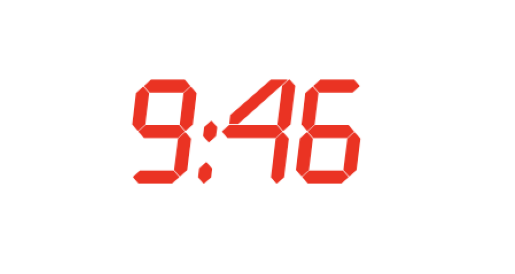

Predicted Time: 03:04


In [151]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

image_path = 'Example2.png'

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # convert to jpg

predicted_time = infer_torch(image, model)

def visualize(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

visualize(image=image)
print("Predicted Time:", predicted_time)


## Вау, после добавления нормализации в infer_torch распозналось. Поигрался с эпохами и батчем и на 7 запуск всё ок

## [Task 10] Model Evaluation - 1 Point

### Description:
Write a function to assess the model's performance on the validation set by calculating accuracy, which is the proportion of correct predictions to total predictions.

### Steps:
1. Define an `evaluate_model` function that receives the model, paths to splits and targets, and the directory containing images.
2. Load the validation set splits and corresponding targets.
3. Iterate over the validation set, performing inference and comparing the predicted time to the actual time.
4. Tally the correct predictions and calculate the accuracy.

**(!!) To achieve full points for this task, the model's accuracy on the validation set must exceed 0.9. Make sure to fine-tune your model and preprocessing steps to meet this benchmark.**

**Two helper functions, special for you:**

In [ ]:
def load_splits(splits_path: str) -> dict:
    """
    Loads train/validation splits from a JSON file.

    This function reads a JSON file specifying which images are in the training set
    and which are in the validation set.

    Args:
        splits_path (str): The path to the JSON file containing the train/validation splits.

    Returns:
        dict: A dictionary with keys 'train' and 'validation', each mapping to a list of image names.
    """
    with open(splits_path, 'r') as file:
        splits = json.load(file)
    return splits


def load_targets(targets_path: str) -> dict[str, str]:
    """
    Loads target time labels for images from a file.

    This function reads a file where each line contains a time label and an image name,
    separated by ' -> '. It creates a dictionary mapping from image names to their corresponding
    time labels.

    Args:
        targets_path (str): The path to the file containing the image names
        and their corresponding time labels.

    Returns:
        dict[str, str]: A dictionary where keys are image names
        and values are their corresponding time labels.
    """
    targets = {}
    with open(targets_path, 'r') as file:
        for line in file:
            time_str, image_name = line.strip().split(' -> ')
            targets[image_name] = time_str
    return targets

In [ ]:
import json
import os


def evaluate_model(
    model: torch.nn.Module,
    splits_path: str,
    targets_path: str,
    images_dir: str,
    image_size: int = 64
) -> float:
    """
    Evaluates model's accuracy on a validation set.

    This function calculates the accuracy of the provided model by comparing its predictions
    with the actual target times for each image in the validation set. It uses a specified
    splits file to determine the images in the validation set and a targets file to get the
    correct time labels.

    Args:
        model (torch.nn.Module): The trained model to evaluate.
        splits_path (str): Path to the JSON file containing the train/validation splits.
        targets_path (str): Path to the file containing the image names and their corresponding time labels.
        images_dir (str): Directory containing the images referenced in the targets file.
        image_size (int, optional): Size to which the images should be resized.

    Returns:
        float: The accuracy of the model on the validation set.
    """
    model.eval()
    splits = load_splits(splits_path)
    targets = load_targets(targets_path)

    # Metrics initialization
    correct_predictions = 0
    total_predictions = 0

    # Evaluate on the validation set
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

    # Calculate accuracy
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
    return accuracy

splits_path = 'timer_dataset/splits.json'
targets_path = 'timer_dataset/targets.txt'
images_dir = 'timer_dataset/images/'

accuracy = evaluate_model(model, splits_path, targets_path, images_dir)
print("\nAccuracy:", accuracy)

In [ ]:
assert accuracy > 0.9, "Try again!"

## [Task 11] Model Conversion and Speed Benchmarking - 1 Point

### Description:
Convert the trained model to different runtimes (JIT, ONNX, TensorRT) and benchmark the inference speed. Document the results in a comparative table.

### Steps:
1. Use the original PyTorch model (referred to as 'Vanilla') and perform inference speed testing.
2. Convert the model using JIT compilation and measure the inference speed.
3. Use the Torch Compile API to compile the model and benchmark the speed.
4. Convert the model to TensorRT and test inference speed.
5. Convert the model to ONNX and test inference speed.

**Vanilla**

In [ ]:
# Ensure, that the model in eval() mode, put it on the device
model = # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

In [ ]:
%%timeit -n 500
image = # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
infer_torch(image, model)

**Jit Tracing**

Torch JIT tracing converts PyTorch models into an optimized, platform-independent format, boosting performance and simplifying deployment. It's useful for efficiently running models across different devices.

In [ ]:
# Create a dummy input for the tracing
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

# Trace the model
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

In [ ]:
%%timeit -n 500
image = # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
infer_torch(image, traced_model)

**Torch Compile**

`torch.compile` is a PyTorch feature that enhances performance by JIT-compiling PyTorch code into optimized kernels. This method speeds up code execution significantly with minimal changes to the existing codebase. It's a step beyond previous PyTorch compiler solutions like TorchScript and FX Tracing, offering more streamlined and efficient optimization.

In [ ]:
# Compile the model
opt_model = # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

In [ ]:
%%timeit -n 500
image = # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
infer_torch(image, opt_model)

**TensorRT**

`TensorRT`, developed by NVIDIA, significantly enhances the speed and efficiency of deep learning models on GPUs. It uses advanced optimization techniques such as layer fusion and precision calibration to maximize throughput and reduce latency. Designed for cross-platform compatibility, it supports various frameworks and is particularly effective in production environments where high-performance inference is crucial.

In [ ]:
import torch_tensorrt

# Create a dummy input for the compile
dummy_input = # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

# Compile the model
tensorrt_model = # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

In [ ]:
%%timeit -n 500
image = # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
infer_torch(image, tensorrt_model)

**ONNX**

`ONNX (Open Neural Network Exchange)` is an open format designed to represent machine learning models. It enables models to be transferred between different frameworks, ensuring interoperability and flexibility. ONNX is widely used for model sharing and deployment across various platforms and tools, making it valuable for developers working in diverse environments or with multiple machine learning frameworks. Its ability to standardize model representation simplifies the process of model exchange and deployment.

In [ ]:
import torch
import torch.onnx

# Create a dummy input for the export
dummy_input = # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

# Export the model, saving it like "model.onnx"
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

In [ ]:
import numpy as np
import onnxruntime as ort


def infer_onnx(
    image: np.ndarray,
    session: ort.InferenceSession,
    image_size: int = 64
  ) -> str:
    """
    Performs inference on a single image using an ONNX model session.

    This function applies validation augmentations and preprocessing to the image, converts it to the
    format expected by the ONNX model, and then uses the session to predict the time. The function
    outputs the predicted time as a string.

    Args:
        image (np.ndarray): The image to be processed and fed into the ONNX model.
        session (ort.InferenceSession): The ONNX model inference session.
        image_size (int, optional): The size to which the image will be resized.

    Returns:
        str: The predicted time as a string in the format 'HH:MM'.
    """
    # Get ONNX model input_name
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

    # Apply validation augmentations
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

    # Preprocess the image
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

    # Convert the image to the batch expected by ONNX, cast to float
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

    # Predict using the ONNX session
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

    # Assuming the model returns two outputs: hour and minute
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE

    # Convert to time format
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
    return time_str

In [ ]:
# We initialize a session first
session = ort.InferenceSession("model.onnx")

In [ ]:
%%timeit -n 500
image = # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ YOUR CODE HERE
infer_onnx(image, session=session)

### Fill the table:

| Runtime   | Number of Loops | Mean Inference Time (ms) | Standard Deviation (ms) |
|-----------|-----------------|--------------------------|-------------------------|
| Vanilla   | 500             | TBD                      | TBD                     |
| JIT       | 500             | TBD                      | TBD                     |
| Compile   | 500             | TBD                      | TBD                     |
| TensorRT  | 500             | TBD                      | TBD                     |
| ONNX      | 500             | TBD                      | TBD                     |

### Your comments on results:

(0_0)

## [Task 12] Rust - 3 Points

<img src="./images/4.jpeg" width=50%>

### About Rust:
Rust is a programming language known for its focus on safety and performance. It's designed to be memory safe, preventing common bugs seen in languages like C and C++. Rust achieves this through its unique ownership system, which manages memory and other resources at compile time, eliminating many runtime errors.

Its performance is comparable to C++, making it suitable for systems programming and applications where speed is critical. Rust also offers modern features like zero-cost abstractions, guaranteed memory safety, and a friendly compiler with useful error messages, enhancing developer experience.

Rust is increasingly popular in areas such as web assembly, embedded systems, and networking, as well as for building command-line tools and desktop applications. Its growing community and rich ecosystem of tools and libraries contribute to its rising adoption.


### Suggested Materials:
- "Rust by Example": A collection of runnable examples that illustrate various Rust concepts and standard libraries.
- "Rustlings": A fun, instructive way to get accustomed to reading and writing Rust syntax through small exercises.
- "Maturin": A tool specifically designed for creating Python extensions in Rust with ease. It integrates seamlessly with Cargo and PyPI, simplifying the process of building and distributing Rust-written Python modules. Ideal for enhancing Python with Rust’s performance and safety features, Maturin makes it straightforward to package and share Rust code as Python packages.

### Why Infer in Rust:
Rust is good for machine learning inference, offering safety and high performance. It avoids latency issues common with garbage collectors and its type system and concurrency model enable efficient, maintainable code. Rust's capabilities allow for serverless inference with lightweight binaries, addressing the slowness of large frameworks like PyTorch in cluster instances. It also reduces Python's performance overhead, a notable advantage given Python's Global Interpreter Lock (GIL) challenges. Rust's growing popularity in the machine learning ecosystem.

Finally, Rust is cool!

---

### Description:
The task involves enhancing a machine learning workflow by integrating Rust's performance capabilities with Python's flexibility. The goal is to use Rust for running an ONNX model inference, and then create Python bindings to utilize the Rust implementation. This hybrid approach aims to leverage Rust's performance and safety while maintaining the ease of use provided by Python.

The project structure includes:
```
.
├── Cargo.toml
├── images
├── HW6.ipynb
├── model.onnx
├── example.png
├── src
│   ├── lib.rs
│   └── main.rs
└── timer_dataset
```

- An example image file `example.png` which could be used for testing the inference process.
- A `model.onnx` file which is our converted model to be used for inference.
- A `Cargo.toml` file indicating the Rust project's dependencies.
- A source directory `src` containing the Rust source code:
  - `lib.rs` which is a Rust library file containing shared logic or definitions.
  - `main.rs` which is the Rust main file, containing the entry point of the Rust application.

**The `.rs` files in the source directory are almost complete but contain errors that need to be fixed. After correcting these errors, you are expected to compile the Rust source into a binary. This binary will be a production-ready executable that performs the ONNX model inference.**

**The second part of the task is to build Python bindings using `maturin`. These bindings will allow Python scripts to call the Rust binary and perform inference. The binding should provide an interface where Python code can pass the paths of the model and image files, and then receive the inference results. The results expected are a string representing the predicted outcome and a float64 value indicating the elapsed time of the model call in Rust.**

### Steps:
1. Debug and correct the Rust code provided in `.rs` files.
2. Compile the corrected Rust code into a production-ready binary for ONNX model inference.
3. Create Python bindings for the Rust binary to allow inference from Python, ensuring the binding returns the predicted time as a string and the elapsed time as a float64.

### Part 1: Binary - 1 Point

Compile a Rust binary that performs ONNX model inference and accurately predicts time from an image.

Instructions:
1. Compile the Rust binary using the provided command. Ensure all dependencies are correctly installed for a successful build.
2. Run the binary with an image to perform inference. The program should output the time taken for inference and the predicted time.

Criteria for Full Points:
 - The Rust binary compiles without errors.
 - Upon execution, the binary prints out the time taken for the inference process and the correct predicted time.

In [ ]:
!cargo build --bin binary -r

In [ ]:
!./target/release/binary

### Part 2: Python Binding - 2 Points

Build a Python binding for the Rust-based ONNX inference engine and validate its functionality through a Python interface.

Instructions:
1. Use maturin to build the Python binding from the Rust implementation.
2. Install the generated wheel using pip to make the binding available to Python.
3. In Python, import the provided binding function and pass the paths of the ONNX model and an image file to it.
4. Check that the function returns the correct prediction and the model's call time measured in Rust.

Criteria for Full Points:
 - The Python binding compiles and installs without errors.
 - The Python code successfully calls the Rust inference engine and returns the correct prediction and elapsed time.

**Binding build and library install:**

In [ ]:
!maturin build -r

In [ ]:
!pip install # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Binding test:**

In [ ]:
from onnx_inference import run_model

In [ ]:
predict, elapsed_time = run_model("model.onnx", "example.png")

In [ ]:
print("Time:", predict, "\nElapsed time:", elapsed_time)

In [ ]:
assert predict == "15:53"